# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 5

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  60 баллов
* Задача 2 &mdash;  60 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash;  30 баллов
* Задача 4 &mdash;  30 баллов







-----

In [22]:
# Bot check

# HW_ID: phds_hw5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from torch import nn, optim
import matplotlib.pyplot as plt

from IPython.display import clear_output

from sklearn.metrics import mean_absolute_percentage_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

---
## <b><font color="blue">Легкая часть</font></b>
### Задача 1

#### *Профиль биология*

Мы будем исследовать датасет по экспрессиям различных генов (RNA-seq), используемых для предсказания возраста пациентов.

In [125]:
df = pd.read_csv("Rnaseq_age_reg.csv")
df.head()

,Age,NM-005483,NM-001286734,NM-080668,NM-001142557,NM-001258451,NM-007317,NM-005030,NM-002105,NM-001067,...,NM-001012507,NM-016448,NM-017669,NM-001160046,NM-004219,NM-001083961,NR-125339,NM-014501,NM-001278324,NM-005496
0,19,0.132011,-0.134300,0.451310,-0.022878,0.018667,0.093849,-0.052866,0.016490,0.124796,...,0.399409,0.603130,0.353623,-0.026512,0.214482,0.089629,-0.373683,-0.634992,0.150399,0.139014
1,19,0.547094,0.048433,0.616353,0.100657,0.449449,0.031947,-0.095406,0.002124,0.297503,...,-0.695090,1.047713,0.274719,-0.026406,-0.174677,0.188904,0.107204,-0.512265,-0.276802,-0.436953
2,19,-0.128915,0.058490,0.545019,0.011446,0.167808,0.193595,0.330663,0.269069,0.271928,...,-0.235994,0.249005,0.185740,-0.073686,0.207569,0.219520,0.104442,0.047305,-0.326697,-0.385664
3,19,0.108909,-0.304070,0.137853,-0.144723,0.454118,0.382229,0.331013,0.438284,0.265608,...,-0.249369,0.099310,0.012135,-0.379289,0.173875,0.458437,-0.295837,0.549386,0.482001,-0.341235
4,20,1.035609,0.878312,0.721720,0.760656,0.779344,0.948431,1.111776,0.548357,0.689128,...,0.781208,1.271952,0.471733,0.685357,1.142871,0.926903,0.571224,0.714480,0.811737,0.854124


Разбейте датасет на признаки и таргет, где в качестве таргета будет использоваться столбец `Age`, а признаки - все остальные. В том числе разбейте на подвыборки для обучения и теста.

In [132]:
y = df['Age'] 

X = df.drop('Age', axis=1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


**Переходите к общей части.**

#### *Профиль физика*

In [ ]:
df = pd.read_csv("physics_data.csv", index_col=0)
df.head()

Разбейте датасет на признаки и таргет, где в качестве таргета будет использоваться столбец Eat, а признаки - все остальные. В том числе разбейте на подвыборки для обучения и теста.

### Общая часть

Отмасштабируйте данные:

In [133]:
scaler = StandardScaler()

# Нормируем train и test.

X_train = scaler.fit_transform(X_train)

#К тестовой выбоке применяем метод .transform

X_test = scaler.transform(X_test)

Обучите модель линейной регрессии и посмотрите на значения метрик на тесте. Что вы можете сказать про результат обучения?

In [134]:
model= LinearRegression(fit_intercept=True)

model.fit(X_train, y_train)

y_preds= model.predict(X_test)

print(f'Значение метрики MAPE: {mean_absolute_percentage_error(y_test, y_preds)}, Значение R^2 : {r2_score(y_test, y_preds)}')

Значение метрики MAPE: 1.7650358271315747, Значение R^2 : -0.05842840513127001


Обучите линейные модели с регуляризациями, которые мы проходили ранее. Для каждой из моделей постройте графики зависимости метрик r2 и MAPE от коэфициента регуляризации. Можно пользоваться кодом из домашнего задания по регуляризации. Сильно ли улучшился результат? 

Воспользуемся функцией `Draw_errors` из прошлого ДЗ

In [135]:
def draw_errors(error, error_name, alphas):

    """
    Функция строит график зависимости величины ошибки от параметра alpha для разных моделей
    
    :param error: функция, вычисляющая ошибку
    :param error_name: имя функции, вычисляющей ошибку (одно из 'MSE', 'MAE', 'MAPE')
    :param alphas: массив величин alpha
    """
    arr = [] # массив ошибок
    for a in alphas:
        tmp = [] # массив ошибок
        models = [Ridge(alpha=a),
                  Lasso(alpha=a),
                  ElasticNet(alpha=a, l1_ratio=0.2),
                  ElasticNet(alpha=a, l1_ratio=0.5),
                  ElasticNet(alpha=a, l1_ratio=0.8)] 
        for model in models:
            
            # обучение модели и предсказание 
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            tmp.append(error(y_test, y_pred))
        arr.append(tmp)

    arr = np.array(arr)
    plt.figure(figsize=(10, 6), dpi=100)

    names = ['Ridge', 'Lasso', 'Elastic, $l_1 = 0.2$',
             'Elastic, $l_1 = 0.5$', 'Elastic, $l_1 = 0.8$'] 
    for i in range(5):
        plt.plot(alphas, arr[:, i], label=names[i]) # рисуем ошибки в зависимости от alpha

    plt.xlabel('Параметр регуляризации')
    plt.ylabel(error_name)
    plt.xscale('log')
    plt.legend()

In [136]:
alphas = np.logspace(-5, 8, 40)

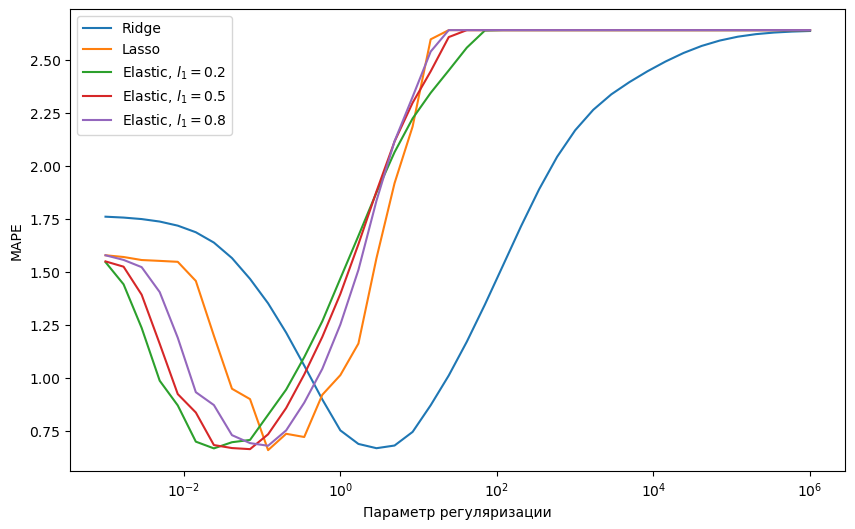

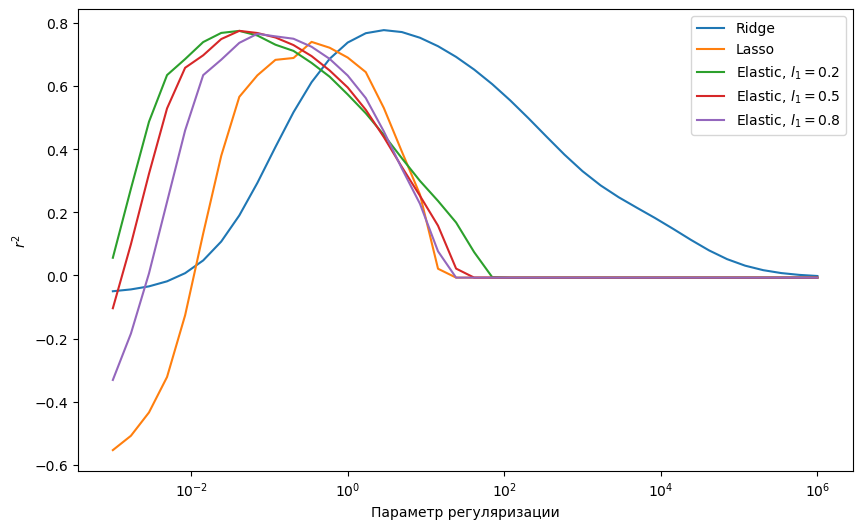

In [137]:
draw_errors(mean_absolute_percentage_error, "MAPE", alphas)
draw_errors(r2_score, "$r^2$", alphas)

Да, видно что результаты улучшились. Если смотреть на ошибки `Lasso` - регрессии, то наилучшие значения: $r^2\approx 0.65$ и $MAPE \approx 1$ значительно отличаются от полученных ранее: $r^2 = 0.07$, $MAPE = 2.82$

Выберите оптимальный, на вашь взгляд, параметр для L1-регуляризации, обучите модель Lasso-регрессии, выведите ещё раз метрики r2 и MAPE и проведите отбор признаков: уберите из датасета все те, для которых коэффициент регрессии оказался нулевым.

Из полученных выше графиков видно, что оптимальное значение параметра $\lambda$ для L1 - регуляризации: $\lambda \approx 0.2$ (Наиболее близкое к 1 значение $r^2$ и наименьшее значение MAPE)

In [203]:
model_lasso = Lasso(alpha=0.3)
model_lasso.fit(X_train, y_train)
y_preds_lasso= model_lasso.predict(X_test)

print(f'Значение метрики MAPE: {mean_absolute_percentage_error(y_test, y_preds_lasso)}',
      f'; Значение R^2 : {r2_score(y_test, y_preds_lasso)}')

Значение метрики MAPE: 0.7112464612547706 ; Значение R^2 : 0.7281267159819435


In [204]:
nonzero_coefs=model_lasso.coef_.nonzero() #Возвращает индексы ненулевых элементов массива
X_train_small = torch.FloatTensor((X_train[:, nonzero_coefs[0]]))
X_test_small = torch.FloatTensor((X_test[:, nonzero_coefs[0]]))
y_test_torch = torch.FloatTensor(y_test.to_numpy()) 
y_train_torch = torch.FloatTensor(y_train.to_numpy()).reshape(-1,1)

In [233]:
X_train_small.shape

torch.Size([107, 46])

Теперь обучите простейшую нейронную сеть на уменьшенном датасете, сравните результат с результатами обучения других моделей.

In [207]:
model = nn.Sequential(nn.Linear(in_features=X_train_small.shape[1], out_features=1))

In [208]:
optim_func = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [209]:
num_iter = 1000
for i in range(num_iter):
    # Шаг 1. 
    # Forward pass: предсказание модели по обучающим данным
    y_pred = model(X_train_small)
    
    # Шаг 2. 
    # Вычисление оптимизируемой функции (MSE) по предсказаниям
    loss = optim_func(y_pred, y_train_torch)
    
    # Шаг 3.
    # Backward pass: вычисление градиентов оптимизируемой функции
    # по всем параметрам модели
    loss.backward()

    # Шаг 4.
    # Оптимизация: обновление параметров по формулам соответствующего
    # метода оптимизации, используются вычисленные ранее градиенты
    optimizer.step()

    # Зануление градиентов
    optimizer.zero_grad()

In [210]:
with torch.no_grad():
    y_pred = model(torch.FloatTensor(X_test_small)).numpy()

print(f'R2: {round(r2_score(y_test, y_pred), 2)} \nMAPE: {round(mean_absolute_percentage_error(y_test, y_pred), 2)}')

R2: 0.73 
MAPE: 0.68


**Вопрос:** объясните полученный результат.

Нейросеть показала лучший результат по сравнению с обычными регрессия предсказаний судя по значениям метрик.

Сравните все модели, поясняя полученные результаты и значения метрик.

**Вывод:** Линейная регрессия показала очень плохой результат на тестовой выборке $r^2 < 0 \Rightarrow$ предсказание хуже чем предсказание средним, возможно это следствие мультиколлинеарности. В пользу этой гипотезы говорит то, что в итоге Нейросеть и `Lasso` показали примерно одинаковый результат при правильном подборе параметра регуляризации $\alpha$, при этом нейросеть показала меньшее значение относительной ошибки `MAPE`.

---
### Задача 2
#### *Профиль физика*

Скачайте [датасет](https://drive.google.com/file/d/1QqYK7Go96vR4l66MShlUuXxY0_FaBcYB/view?usp=sharing), описывающий распады Z-бозонов двух типов: `Zee`и `Zmumu`. Создайте и обучите нейросеть, разделяющую эти два класса.

[Описание датасета](https://www.kaggle.com/datasets/omidbaghchehsaraei/identification-of-two-modes-of-z-boson?resource=download)


In [ ]:
data = pd.read_csv('Z_boson.csv')
data.head()

Удалите столбцы `Unnamed: 0`, `Run` и `Event`, так как это не физические величины. Удалите строки, где есть пропуски, если таковые имеются.

Также можно как-нибудь взглянуть на признаки. Возможно, не все они вносят вклад в разделение классов. Не забудьте преобразовать таргет (столбец `class`) к формату 0 и 1. Вам может пригодиться `sklearn.preprocessing.LabelBinarizer`.


In [ ]:
plt.figure(figsize=(20, 10))
sns.set_theme(font_scale=2.0)
sns.pairplot(data, hue="class", palette="deep")

Какие признаки вы бы использовали для разделения людей по классам? Выберите эти столбцы и создайте наборы train и test с помощью функции train_test_split, а также выделите набор данных для валидации при обучении.

In [142]:
# исходя из графиков, отберём признаки для обучения
selected_features = [<...>]
X = data[selected_features]

In [143]:
# таргет преобразуем из строк "Zee", "Zmumu" к 0 и 1
<...>

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
X_val, X_test, y_val, y_test  = train_test_split(X_test, y_test, train_size=0.3)

**Переходите к общей части.**

### Профиль биология

Скачайте [датасет](https://miptstats.github.io/courses/ad_mipt.html), описывающий влияние курения и алкоголя на человека. Создайте и обучите нейросеть, разделяющую эти два класса.

[Описание датасета](https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset)

In [238]:
df = pd.read_csv("hw5_task2_bio.csv")

In [239]:
df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,...,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000,900000.000000
mean,47.621844,162.235472,63.279611,81.234265,0.980715,0.978545,1.031481,1.030556,122.435564,76.054088,...,56.934209,113.051212,132.091623,14.229134,1.094289,0.860543,25.985102,25.757769,37.135148,1.607948
std,14.182011,9.283002,12.511950,11.858081,0.605406,0.604968,0.174614,0.172110,14.540081,9.887593,...,17.424913,35.870497,101.912819,1.585085,0.437941,0.489582,22.931597,26.449918,50.439381,0.818388
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


In [240]:
df.columns, df.shape

(Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
        'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
        'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
        'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
        'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
       dtype='object'),
 (900000, 24))

In [241]:
column_names = df.columns[1:-2]# нам не нужны гендер и таргеты сейчас

In [242]:
column_names

Index(['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right',
       'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS', 'tot_chole',
       'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein',
       'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP'],
      dtype='object')

Попробуем классифицировать людей с плохими привычками и без них, чтобы облегчить нам задачу. Для этого создадим дополнительный столбец в таблице, который будет содержать информацию о том, имеет ли человек вредные привычки или нет.

In [243]:
def smoking_preprocessing(x):
  if x == 3 or x == 2:
    return 1
  else:
    return 0

def drinking_preprocessing(x):
  if x == 'Y':
    return 1
  else:
    return 0

In [244]:
df['SMK_stat_type_cd'] = df['SMK_stat_type_cd'].apply(func = smoking_preprocessing)
df['DRK_YN'] = df['DRK_YN'].apply(func = drinking_preprocessing)

In [245]:
df['bad_habits'] = df['DRK_YN']+df['SMK_stat_type_cd']-df['DRK_YN']*df['SMK_stat_type_cd']

Теперь смотрим на разделение по привычкам

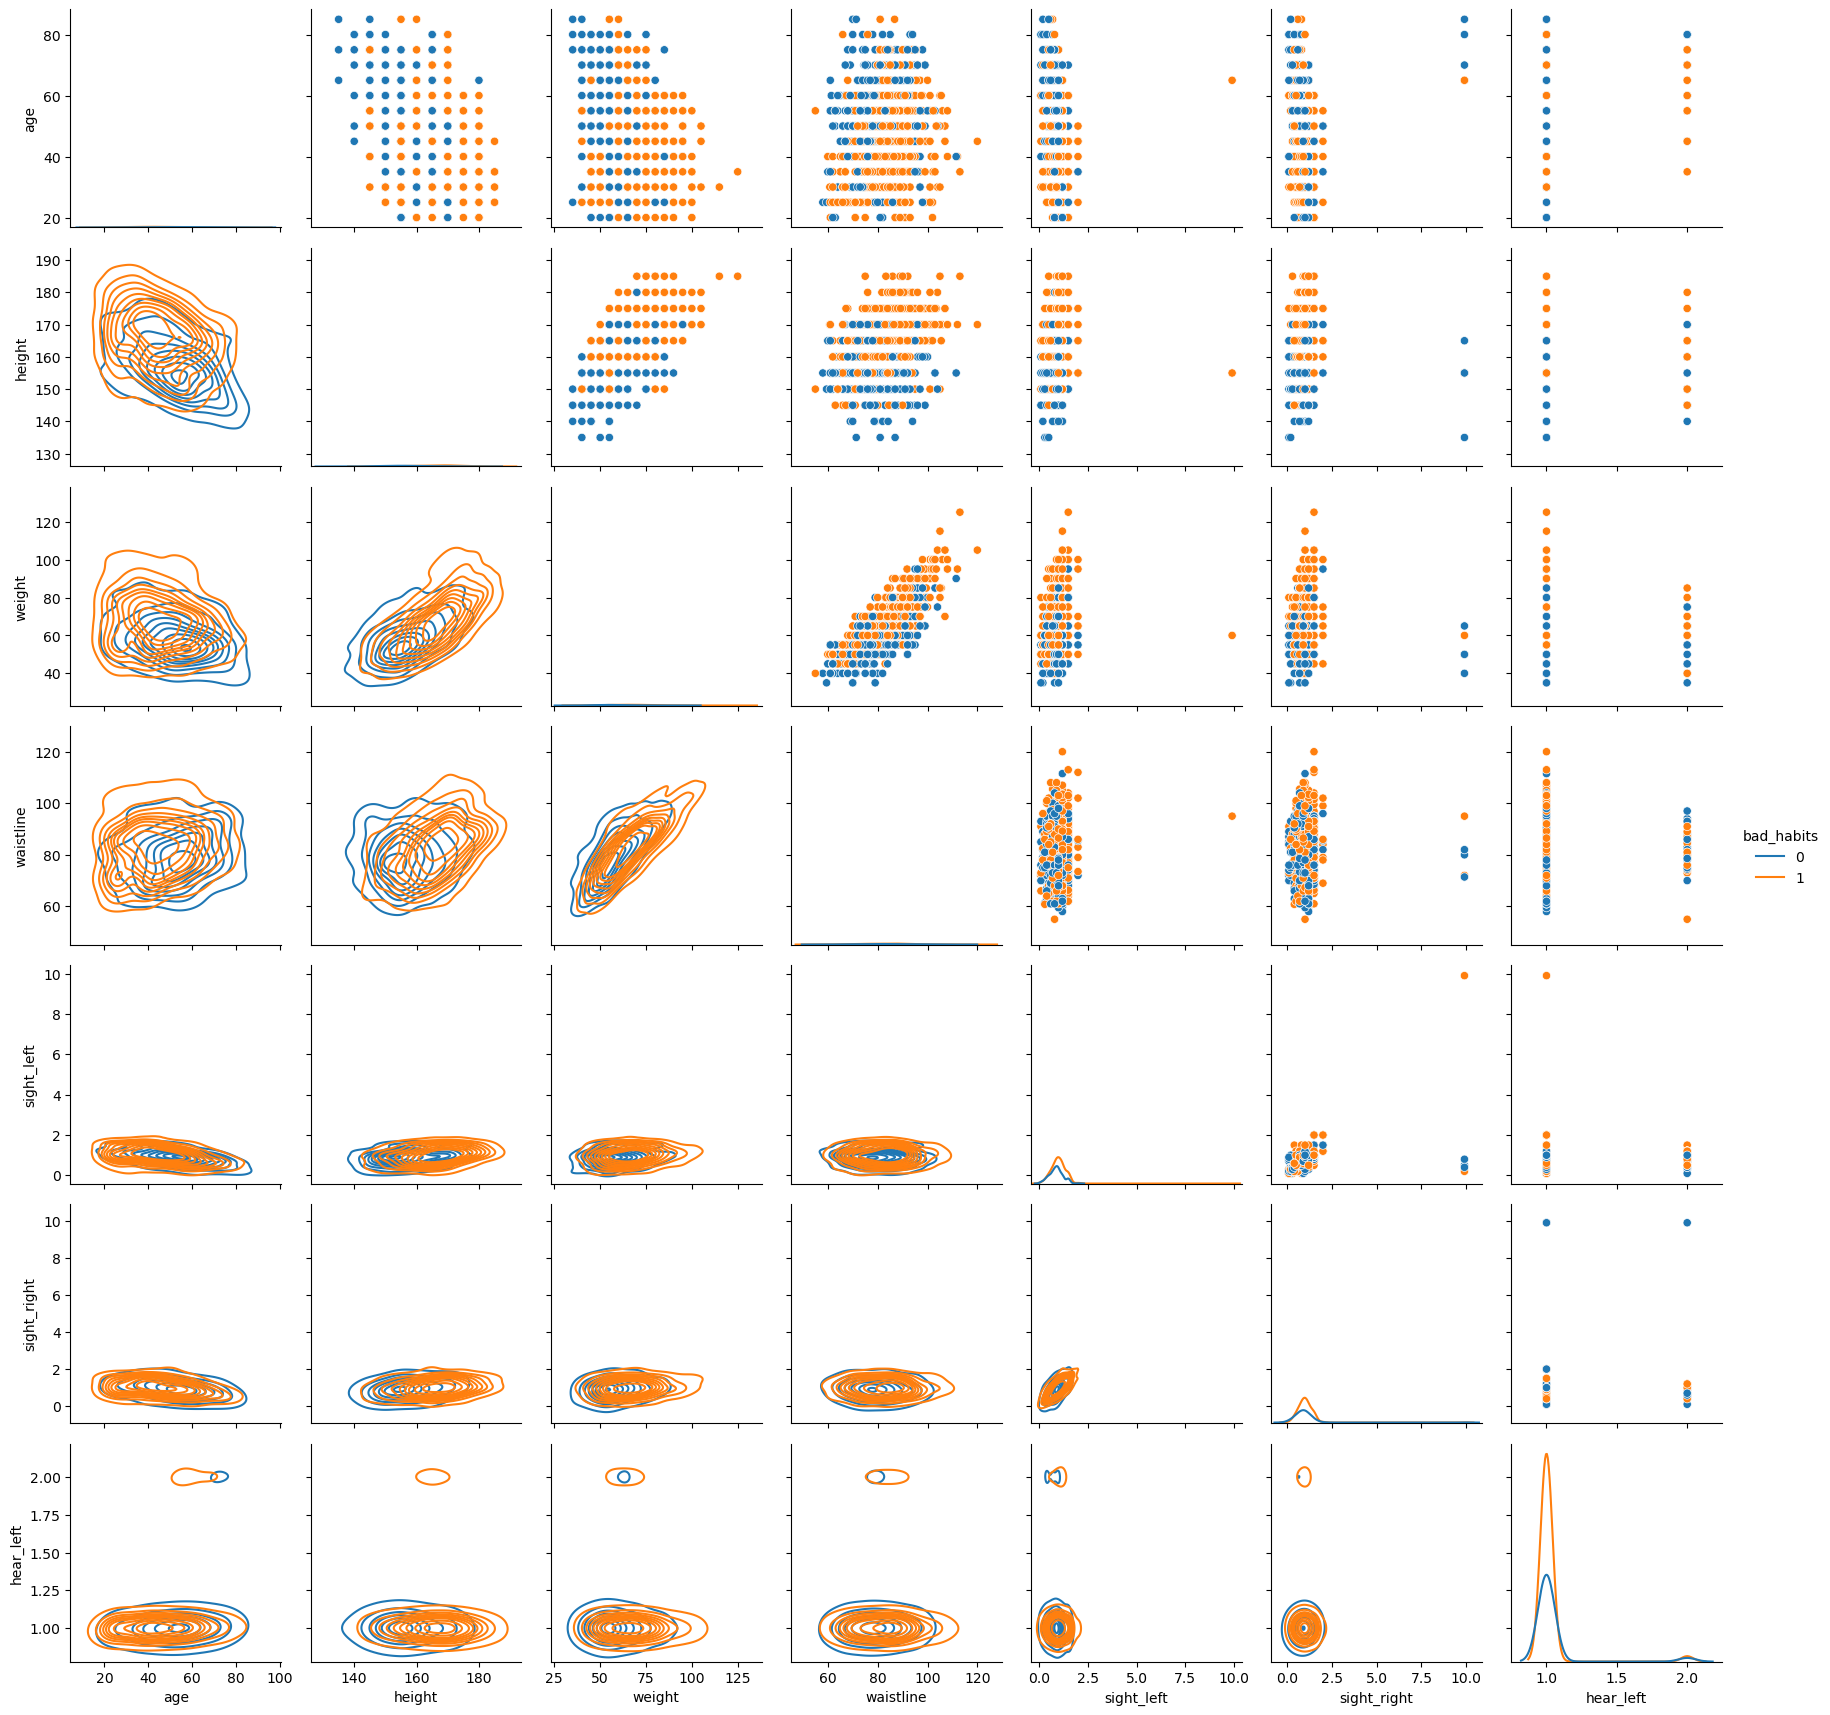

In [220]:
graph = sns.PairGrid(df.iloc[:1000], hue='bad_habits', vars = column_names[:7])
graph.map_upper(sns.scatterplot)
graph.map_lower(sns.kdeplot)
graph.map_diag(sns.kdeplot)
graph.add_legend()

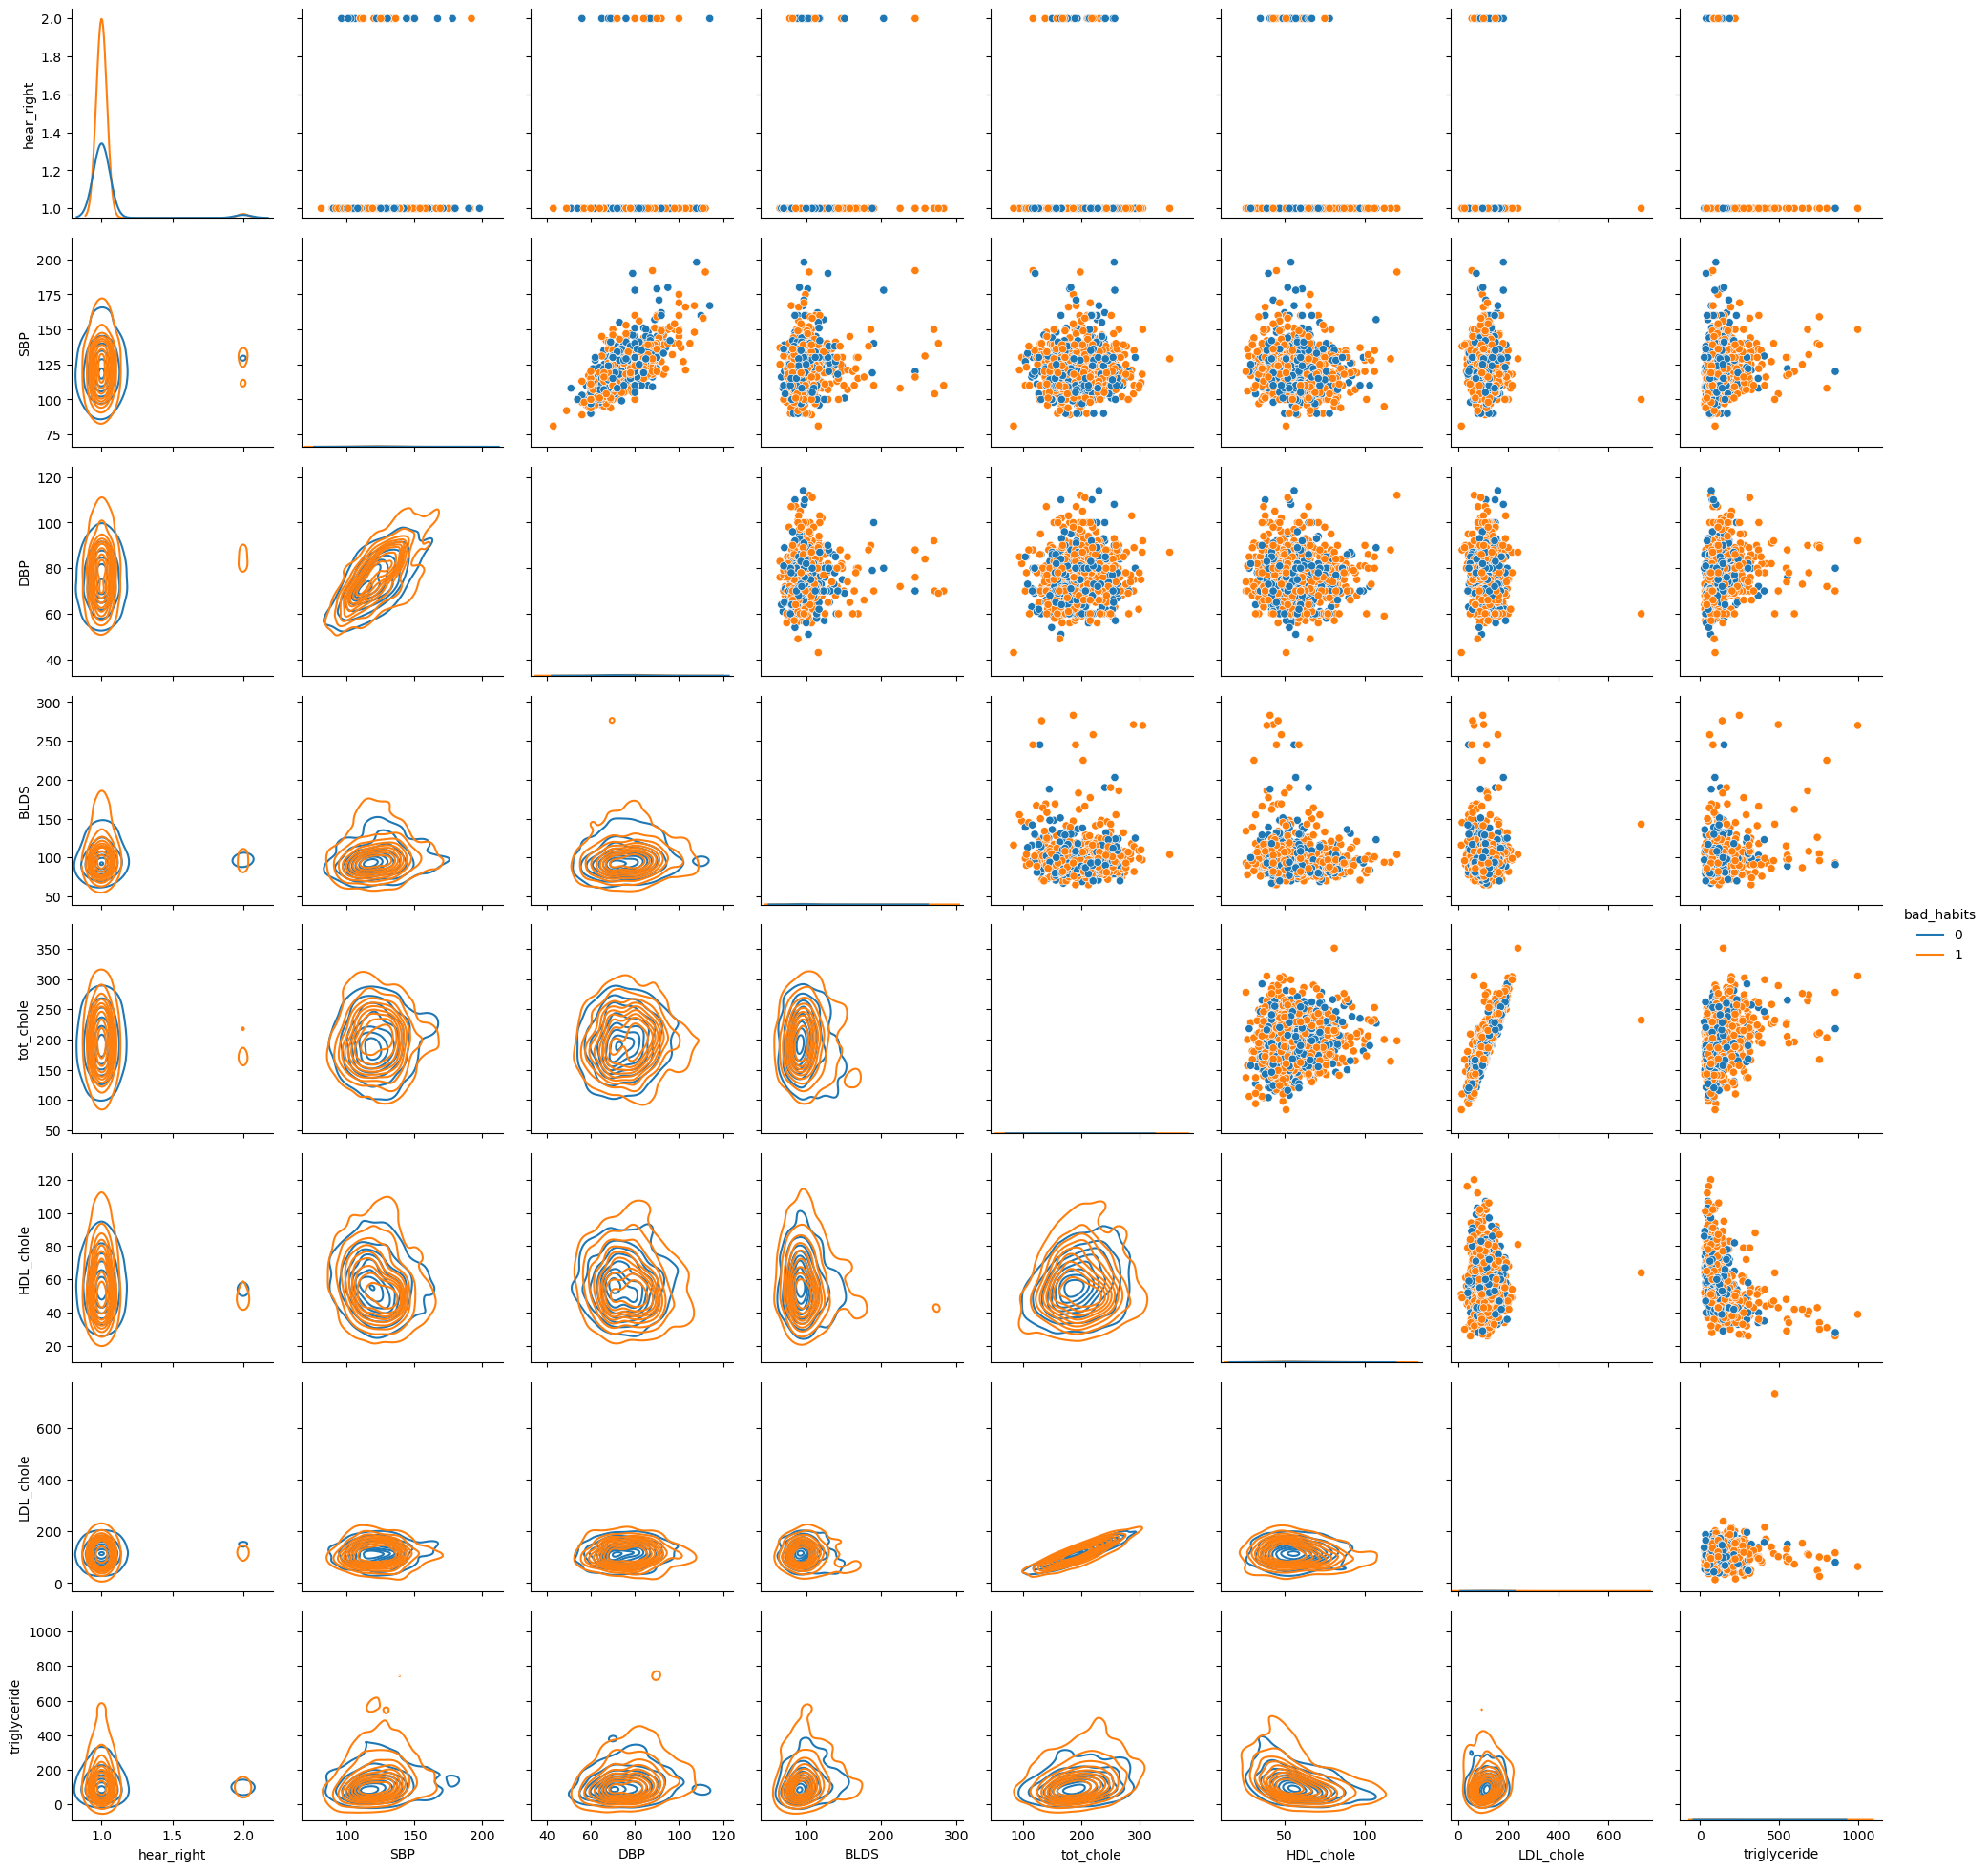

In [221]:
graph = sns.PairGrid(df.iloc[:1000], hue='bad_habits', vars = column_names[7:15])
graph.map_upper(sns.scatterplot)
graph.map_lower(sns.kdeplot)
graph.map_diag(sns.kdeplot)
graph.add_legend()

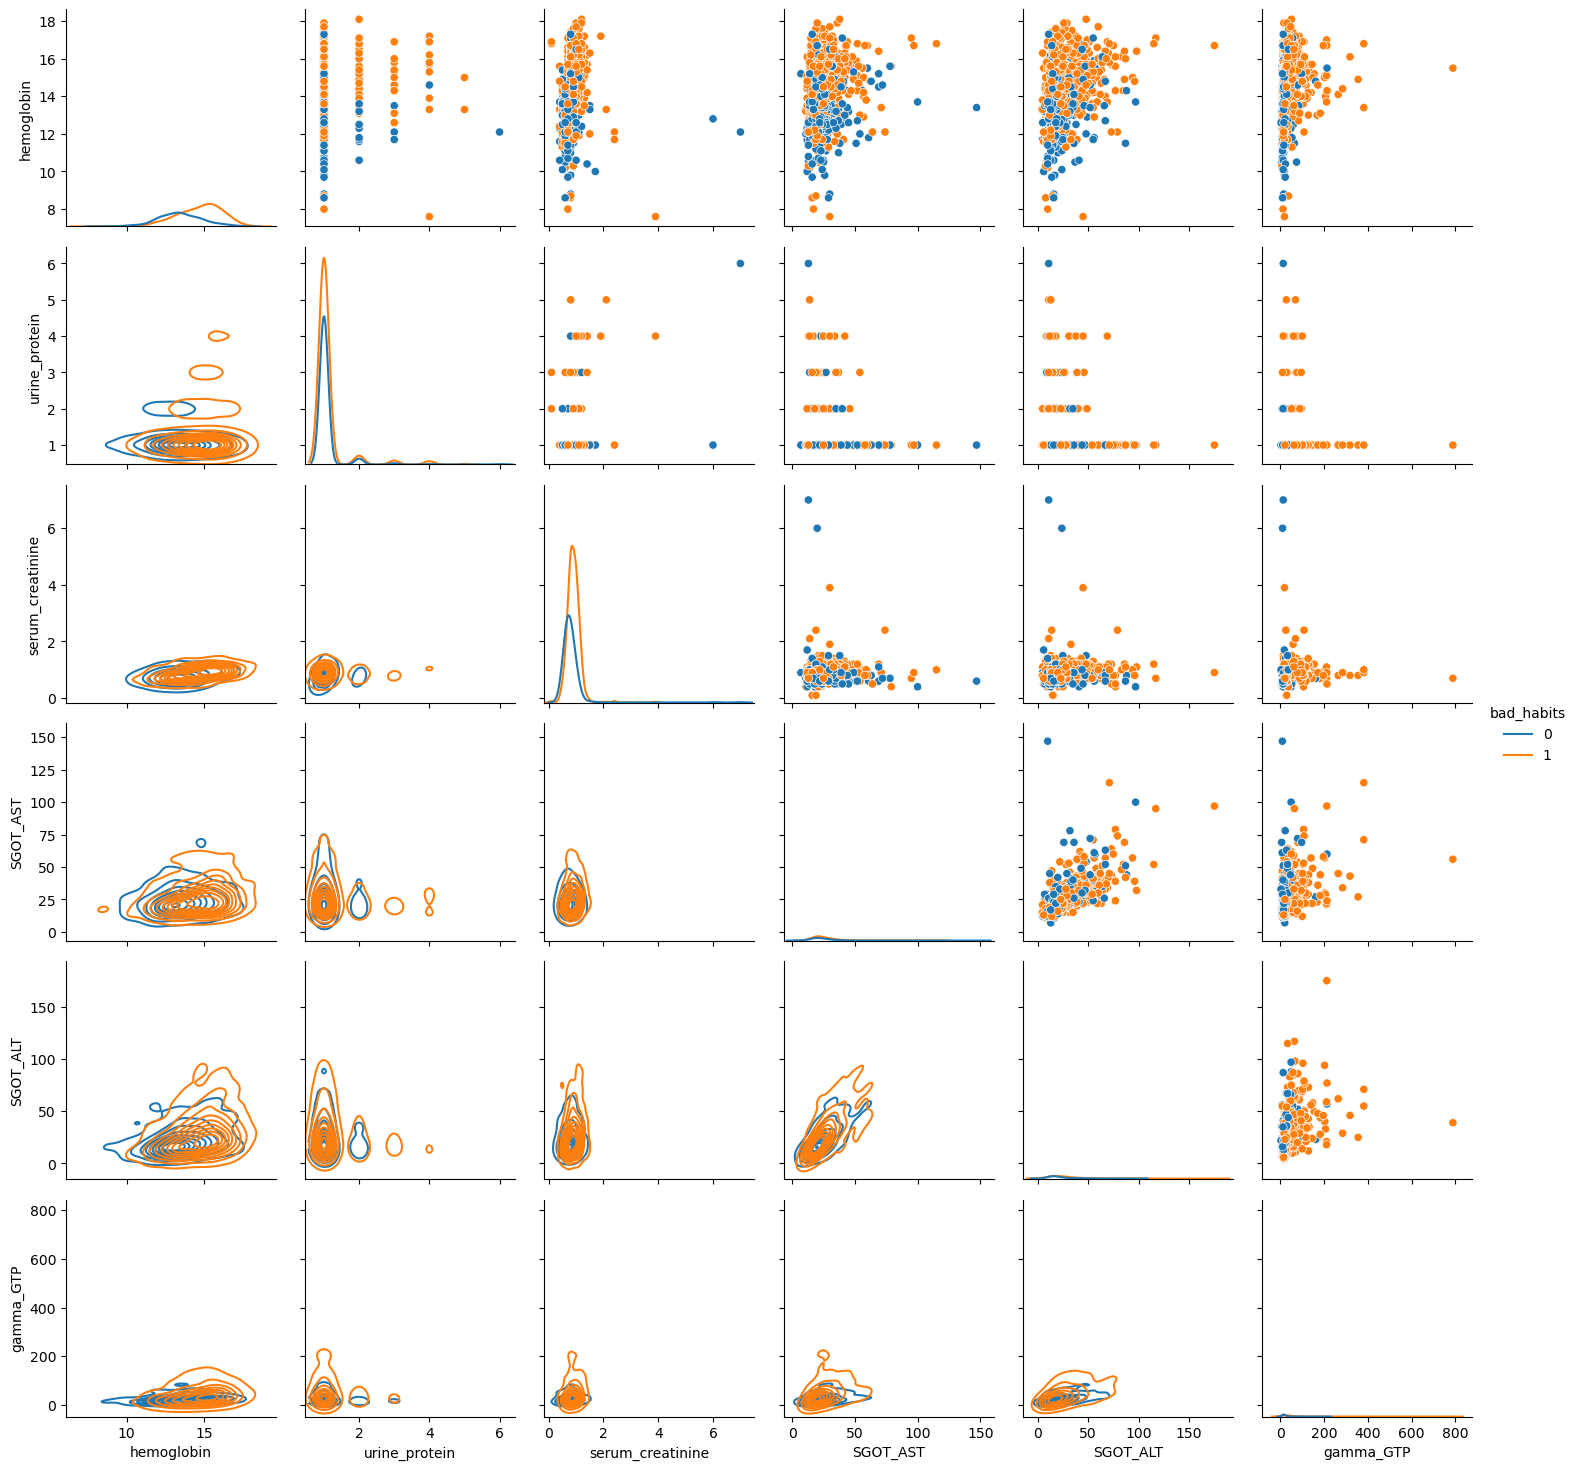

In [222]:
graph = sns.PairGrid(df.iloc[:1000], hue='bad_habits', vars = column_names[15:])
graph.map_upper(sns.scatterplot)
graph.map_lower(sns.kdeplot)
graph.map_diag(sns.kdeplot)
graph.add_legend()

In [246]:
target_1 = df.pop('SMK_stat_type_cd')
target_2 = df.pop('DRK_YN')
target_3 = df.pop('bad_habits')

Какие признаки вы бы использовали для разделения людей по классам? Выберите эти столбцы и создайте наборы train и test с помощью функции train_test_split, а также выделите набор данных для валидации при обучении.

In [381]:
# исходя из графиков, отберём признаки для обучения (нас интересуют вредные привычки)
selected_features = ['height', 'weight', 'waistline', 'hemoglobin']
X = df[selected_features]
y = torch.FloatTensor(target_3.to_numpy()).reshape(-1,1)

In [382]:
# данных очень много, поэтому для экономии времени автор ноутбука отводит на обучение всего треть датасета
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3)
X_val, X_test, y_val, y_test  = train_test_split(X_test, y_test, train_size=0.3)

## Общая часть

Как вы помните, в задаче классификации предсказывается вероятность. На основании этой вероятности можно делать вывод о принадлежности объекта к тому или иному классу. Причём не всегда используется порог $P=0.5$. Например, если классы несбалансированы, это значение можно варьировать на интервале (0, 1). Предоставляем вам возможность самим выбрать этот порог и поэкспериментировать.

В нашем случае видно, что класса `1` немного больше, поэтому следует поставить заначение $P$ чуть меньше 0.5

In [383]:
class_lim_proba =  0.4 # критерий принадлежности к тому или иному классу

Стандартизируйте данные

In [384]:
scaler = StandardScaler()

# Нормируем train и test.

X_train = scaler.fit_transform(X_train)

#К тестовой выбоке применяем метод .transform
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
X_val = torch.FloatTensor(X_val)

Напишем функцию для отрисовки кривых обучения. На одном графике расположим значение функции потерь на трейне и валидации, а на другом &mdash; значение метрики качества на ваш выбор, также для трейна и валидации.

In [385]:
def plot_learning_curves(history):
    '''
    Функция для отображения лосса и метрики во время обучения.
    '''
    clear_output(wait=True)

    fig = plt.figure(figsize=(20, 7))
    fontsize = 15   # размер шрифта

    plt.subplot(1,2,1)
    plt.title('Лосс', fontsize=fontsize)
    plt.plot(history['loss_train'], label='train')
    plt.plot(history['loss_val'],   label='val')
    plt.ylabel('лосс',  fontsize=fontsize)
    plt.xlabel('эпоха', fontsize=fontsize)
    plt.legend()

    plt.subplot(1,2,2)
    plt.title('Метрика', fontsize=fontsize)
    plt.plot(history['metric_train'], label='train')
    plt.plot(history['metric_val'],   label='val')
    plt.ylabel('Значение метрики', fontsize=fontsize)
    plt.xlabel('эпоха',    fontsize=fontsize)
    plt.legend()
    plt.show()

Напишите функцию метрики, которую вы будете использовать, например accuracy:

$$\texttt{accuracy}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples}-1} 1(\hat{y}_i = y_i)$$   где $1(x)$ - функция индикатора

In [386]:
def metric(y_true, y_pred, class_lim_proba):
    y_pred_t = y_pred.detach().numpy().reshape(-1)
    y_true_t = y_true.numpy().reshape(-1)
    res = np.sum((y_pred_t >= class_lim_proba) == y_true_t)/len(y_pred_t)
        
    return res

#### Создание модели.
В семинаре вы у промежуточных слоёв задавали `in_features = out_features = 1`, а в данном случае вам надо будет создать нейросеть из нескольких слоёв, поставив только у последнего из них `out_features = 1`.

Какой должна быть размерность входа первого слоя?

In [387]:
X_train.shape

torch.Size([270000, 4])

Видно, что размерность входа первого слоя: $dim_{1}^{in}=4 = d$, число признаков

In [388]:
model = nn.Sequential(nn.Linear(in_features=4, out_features=4), 
                      nn.Softplus(), nn.Linear(in_features=4, out_features=1), nn.Sigmoid())

model

Sequential(
  (0): Linear(in_features=4, out_features=4, bias=True)
  (1): Softplus(beta=1, threshold=20)
  (2): Linear(in_features=4, out_features=1, bias=True)
  (3): Sigmoid()
)

#### Обучение

В качетсве функции потерь возьмите [бинарную кросс-энтропию](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html), а шаг градиентного спуска установите равным 0.5. Можете взять и другие loss и `lr`, если хотите поэкспериментировать.

In [389]:
optim_func = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.5)

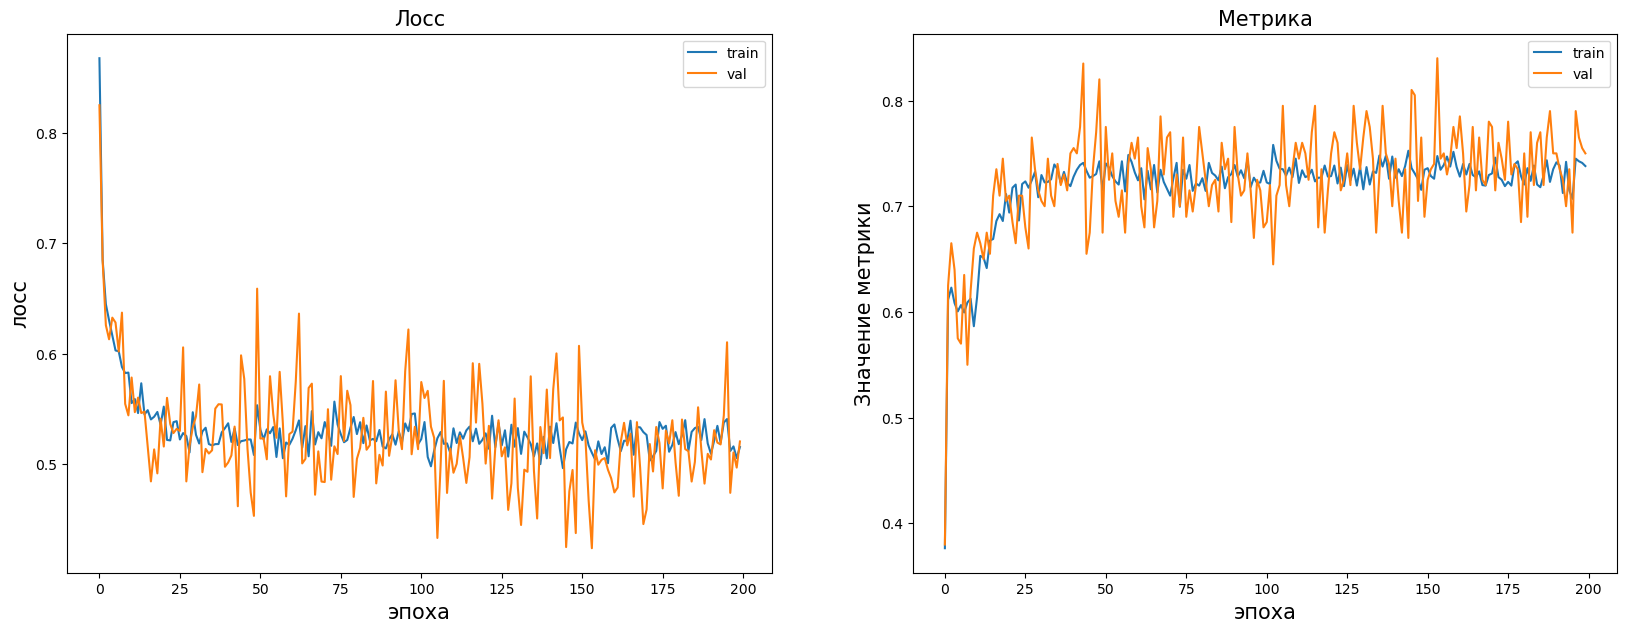

In [390]:
batch_size = 2000 # этот
num_iter = 200    # и этот параметры можете также поварьировать
history = {
    'loss_train': [],
    'loss_val': [],
    'metric_train': [],
    'metric_val': [],
}

for i in range(num_iter):
    
    # Так как размер выборки слишком велик, то будем обучать лишь на части данных
    indexes_train = np.random.choice(np.arange(len(X_train)), batch_size, replace=False)
    local_X_train = X_train[indexes_train]
    local_y_train = y_train[indexes_train]

    indexes_val = np.random.choice(np.arange(len(X_val)), batch_size//10, replace=False)
    local_X_val = X_val[indexes_val]
    local_y_val = y_val[indexes_val]

    # Forward pass: предсказание модели по данным X_train
    y_pred_train = model(local_X_train)
    with torch.no_grad():
        y_pred_val = model(local_X_val)


    # Вычисление оптимизируемой функции (MSE) по предсказаниям
    loss_train = optim_func(y_pred_train, local_y_train)
    with torch.no_grad():
        loss_val = optim_func(y_pred_val, local_y_val)

    # Backward pass: вычисление градиентов оптимизируемой функции
    # по всем параметрам модели
    loss_train.backward()

    # Оптимизация: обновление параметров по формулам соответствующего
    # метода оптимизации, используются вычисленные ранее градиенты
    optimizer.step()

    # Зануление градиентов
    optimizer.zero_grad()

    # Считаем метрику на эпохе (здесь посчитана acuracy, можете реализовать любую другую за доп. баллы)
    metric_train = metric(local_y_train, y_pred_train, class_lim_proba)
    metric_val = metric(local_y_val, y_pred_val, class_lim_proba)

    # Сохраняем результаты эпохи
    history['loss_train'].append(loss_train.item())
    history['loss_val'].append(loss_val)
    history['metric_train'].append(metric_train)
    history['metric_val'].append(metric_val)

    # График Метрики + Лосса для трейна и валидации каждую итерацию
    plot_learning_curves(history)

Тестирование

In [391]:
with torch.no_grad():
      y_pred_test = model(X_test)
      loss_test = optim_func(y_pred_test, y_test)
      metric_test = metric(y_test, y_pred_test, class_lim_proba)
print(f" Test Loss: {loss_test} \n Test metric: {metric_test}")

 Test Loss: 0.5206942558288574 
 Test metric: 0.7312585034013606


Данные значения получены для $P=0.4$ и модели с $\sigma_1=$ `nn.SoftPlus`
и $\sigma_2=$ `nn.Sigmoid` - логистической сигмоидой

**Выводы:** Из полученных графиков видно, что двухслойная нейронная сеть: `Linear` $\Longrightarrow$ `SoftPlus`$\Longrightarrow$ `Linear`$\Longrightarrow$ `Sigmoid` не смогла обучиться нормально предсказывать вредные привычки у людей однако наилучшие результаты были достигнуты исследуя 4 выбранных мною признака: `height`, `weight`, `waistline`, `hemoglobin`. Данный результат связан по большей части со слабой дифференцированностью признаков.

---
## <b><font color="orange">Сложная часть</font></b>
### Задача 3

В этой задаче мы будем вручную реализовывать усложнение для линейной регрессии, которое вы рассматривали на семинаре. 

Запрещено использовать torch.nn (саму библиотеку torch использовать можно и нужно). Чтобы иметь перед глазами оставим здесь формулы:

$$\widehat{y}(x) = w_1u(x) + b_1,$$

$$u(x) = \sigma(w_0x + b_0),$$

$$\sigma(x) = \text{ReLU}(x) = \begin{equation*}\begin{cases}x, \; x \ge 0, \\ 0, \; \text{иначе,} \end{cases} \end{equation*}$$

$w_0, b_0 \in \mathbb{R}$ &mdash; обучаемые параметры первого слоя, $w_1, b_1 \in \mathbb{R}$ &mdash; обучаемые параметры второго слоя, $\sigma(x)$ &mdash; функция активации, в данном случае мы выбрали `ReLU`.

Реализуйте функцию активации(В нашем случае это `ReLU`: $\int_{-\infty}^{\infty}\theta(x)$, интеграл $\theta$-функции Хевисайда):

In [49]:
def act_func(x):
    res = torch.maximum(torch.zeros_like(x), x)
    return res

Задайте оптимизируемую функцию / функцию ошибки / лосс — [MSE](https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества):

$$
    MSE(\widehat{y}, y) = \frac{1}{n}\sum_{i=1}^n\left(\widehat y_i - y_i\right)^2
$$

In [50]:
def optim_func(y_pred, y_true):
    res = torch.sum((y_pred.squeeze()- y_true.squeeze())**2) / len(y_true)
    return res

Обучите вашу модель на датасете с семинарского задания. Сравните полученный результат с результатом семинара.

In [51]:
def load_boston(file_path='./boston.csv'):
    # выделяем признаки и таргет
    raw_df = pd.read_csv(file_path)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    return data, target

In [52]:
data, target = load_boston()

In [53]:
x = torch.FloatTensor(data[:, -1]/10).reshape(-1, 1)
y = torch.FloatTensor(target).reshape(-1, 1)

x.shape, y.shape

(torch.Size([506, 1]), torch.Size([506, 1]))

In [54]:
x_train3, x_val, y_train3, y_val = train_test_split(x, y, test_size=0.2)

In [55]:
y_pred3.shape

torch.Size([102, 1])

In [56]:
# Инициализация параметров
w0 = torch.randn(1, requires_grad=True)
b0 = torch.zeros(1, requires_grad=True)
w1 = torch.randn(1, requires_grad=True)
b1 = torch.zeros(1, requires_grad=True)

# Количество итераций
num_iter = 1000

#Массив ошибок
losses_3=[]

# Скорость обучения для параметров
lr_w = 0.01
lr_b = 0.05

for i in range(num_iter):

    # Forward pass: предсказание модели
    y_pred3 = w1*act_func(w0*x_val + b0) + b1

    # Вычисление оптимизируемой функции (MSE)
    loss = optim_func(y_val, y_pred3)
    # Bakcward pass: вычисление градиентов
    loss.backward()

    # Оптимизация: обновление параметров
    w0.data -= lr_w * w0.grad.data
    b0.data -= lr_b * b0.grad.data
    w1.data -= lr_w * w1.grad.data
    b1.data -= lr_b * b1.grad.data

    # Зануление градиентов
    w0.grad.zero_()
    b0.grad.zero_()
    w1.grad.zero_()
    b1.grad.zero_()
    
    #Добавим ошибку
    losses_3.append(loss)

Теперь, когда всё получилось ~наконец-то~ можем посчитать значение $MSE$ для реализованной модели.

In [57]:
print(f'MSE: {losses_3[999]}')

MSE: 26.45088005065918


**Вывод:** В данной задаче мы пытались реализовать двухслойную нейросеть, использованную на предыдущем семинаре. Низкое значение `Mean Squared Error` говорит о том, что нейронная сеть с двумя слоями обучилась намного лучше. Хотя в данном задании у меня получилось значение меньшее, чем на семинаре $\approx 35$, что немного странно.

---
### Задача 4

Рассмотрим двуслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронку можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$





**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?



![image](./nn.png)

Видно, что в данном случае у модели $d=1$ и $M=1$, так как $x\in\mathbb{R}$ и $y\in\mathbb{R}$, а также $H=2$. Нетрудно заметить, что для произвольных значений числа признаков - $d$, размерности выхода первого слоя - $H$ и размерности последнего (второго) выхода - $M$ суммарное число обучаемых параметров модели будет равно: $N_{\Sigma}\ = (d+1)H + (H+1)M$

В нашем случае $N_{\Sigma}\ = (1+1)\cdot 2\ + (2+1)\cdot 3\ = 7$

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.


**2.1.** Начнем с производной MSE по выходам сети:
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \frac{\partial}{\partial \widehat{y}(X)}\left( \frac{(Y - \widehat{y}(X))^T(Y - \widehat{y}(X)}{n}\right)  = \frac{-2\left(Y^T +\widehat{y}(X)^T\right)}{n}$$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = \; ...$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = \; ...$$

Также выпишем производные выходов сети по входам последнего слоя:

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = \; ...$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{2h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial u_h}$$

**2.3.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$:

$$\frac{\partial\:\sigma(x)}{\partial x} = \; ...$$

Теперь возьмем производные выходов первого слоя по его параметрам:

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \; ...$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \; ...$$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

...

**Вывод:**

...